<a href="https://colab.research.google.com/github/eduardez/Machine-Learning-ESI/blob/master/ELM_Iquitos(00_03)L.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1 - Introduction

##1.1 - The features in the dataset

General

Var | Meaning
--- | ---
city | Ciudad
week_start_date | Fecha de inicio de la semana

NOAA's GHCN daily climate data weather station measurements

Var | Meaning
--- | ---
station_max_temp_c | Maximum temperature
station_min_temp_c | Minimum temperature
station_avg_temp_c | Average temperature
station_precip_mm | Total precipitation
station_diur_temp_rng_c | Diurnal temperature range


PERSIANN satellite precipitation measurements (0.25x0.25 degree scale)

Var | Meaning
--- | ---
precipitation_amt_mm | Total precipitation

NOAA's NCEP Climate Forecast System Reanalysis measurements (0.5x0.5 degree scale)

Var | Significado
--- | ---
reanalysis_sat_precip_amt_mm | Total precipitation
reanalysis_dew_point_temp_k | Mean dew point temperature (Temperatura media del rocío)
reanalysis_air_temp_k | Mean air temperature
reanalysis_relative_humidity_percent | Mean relative humidity
reanalysis_specific_humidity_g_per_kg | Mean specific humidity
reanalysis_precip_amt_kg_per_m2 | Total precipitation (kg/m2)
reanalysis_max_air_temp_k | Maximum air temperature
reanalysis_min_air_temp_k | Minimum air temperature
reanalysis_avg_temp_k | Average air temperature
reanalysis_tdtr_k | Diurnal temperature range


Satellite vegetation - Normalized difference vegetation index (NDVI) - NOAA's CDR Normalized Difference Vegetation Index (0.5x0.5 degree scale) measurements 

Var | Significado
--- | ---
ndvi_se | Pixel southeast of city centroid
ndvi_sw | Pixel southwest of city centroid
ndvi_ne | Pixel northeast of city centroid
ndvi_nw | Pixel northwest of city centroid

## 1.2 - Objetives

The purpose of this work is to explore the environmental data collected by various U.S.
Federal Government Agencies from two cities ( San Juan, Puerto Rico and Iquitos, Peru) to
gain a better understanding of the Denge Spread Phenomena.
These data are from a competition of the site DrivenData 1
. Training data will be used 2
.
The overall objective is to **use unsupervised learning techniques to make a preliminary exploration of the data and to extract conclusions from discarded elements, etc**. The specific
objectives are as follows:
1. Identification of outliers elements (weeks) in the dataset
2. Use clustering algorithms to identify groups and characterize them.
3. (optional) Feature Selection using clustering algorithms

### **The ELM group has been assigned the city of Iquitos (2000-2003)**



##1.3 - Imports and data load

In [1]:
# data load and manipulation
from google.colab import files
import io
# dataframes library
import pandas as pd
# visualization 
import matplotlib.pyplot as plt
import seaborn as sns
from yellowbrick.cluster import SilhouetteVisualizer
# basic operations
import numpy as np
from numpy import corrcoef, transpose, arange
import itertools
# normalización
from sklearn import preprocessing 
#pca
from sklearn.decomposition import PCA
import plotly.express as px
from sklearn.decomposition import FastICA
#DBSCAN
import sklearn.neighbors
import plotly.express as px
from sklearn.cluster import DBSCAN

#k-means
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
from sklearn.datasets import make_blobs
import matplotlib.cm as cm
from sklearn.metrics import silhouette_score



/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


We use ours GitHub Repository to store the data for automatic loading 😎

In [2]:
raw_dataset_features = pd.read_csv('https://raw.githubusercontent.com/eduardez/Machine-Learning-ESI/Limpio/dengue_features_train.csv',index_col=[0,1,2])
raw_dataset_labels = pd.read_csv('https://raw.githubusercontent.com/eduardez/Machine-Learning-ESI/Limpio/dengue_labels_train.csv',index_col=[0,1,2])
raw_dataset_features

week_start_date  ...  station_precip_mm
city year weekofyear                  ...                   
sj   1990 18              1990-04-30  ...               16.0
          19              1990-05-07  ...                8.6
          20              1990-05-14  ...               41.4
          21              1990-05-21  ...                4.0
          22              1990-05-28  ...                5.8
...                              ...  ...                ...
iq   2010 21              2010-05-28  ...               27.0
          22              2010-06-04  ...               36.6
          23              2010-06-11  ...                7.4
          24              2010-06-18  ...               16.0
          25              2010-06-25  ...               20.4

[1456 rows x 21 columns]

#2 - Initial exploration and preprocessing

##2.1 -  Year filter

In this first part we have to focus on the period of time between 2000 and 2003. So we have to apply a filter to achieve this task using pandas library.

In [3]:
dataset_features = raw_dataset_features.loc['iq']
dataset_features = dataset_features.loc[2000:2003]

dataset_labels = raw_dataset_labels.loc["iq"]
dataset_labels = dataset_labels.loc[2000:2003]
dataset_features

week_start_date  ...  station_precip_mm
year weekofyear                  ...                   
2000 26              2000-07-01  ...                3.0
     27              2000-07-08  ...               55.6
     28              2000-07-15  ...               38.1
     29              2000-07-22  ...               30.0
     30              2000-07-29  ...                4.0
...                         ...  ...                ...
2003 48              2003-11-26  ...               26.2
     49              2003-12-03  ...              138.0
     50              2003-12-10  ...               47.4
     51              2003-12-17  ...               66.8
     52              2003-12-24  ...              185.7

[182 rows x 21 columns]

## 2.2 - Dimensionality Reduction


## 2.2.1 - Correlation





It is important to remove redundancy. For example, week_start_date could be inferred from weekofyear and year.



In [4]:
dataset_features.drop("week_start_date", axis = 1, inplace = True)

We can use correlation to do feature reduction, those perfectly correlated variable are truly redundant in the sense that no additional information is gained by adding them.

Before we start with the correlation other important task is to treat the lost values in the data, since if we don't do it, our work will be very difficult.

We have to see if there is any missing data.

In [5]:
pd.isnull(dataset_features).sum()

ndvi_ne                                  1
ndvi_nw                                  1
ndvi_se                                  1
ndvi_sw                                  1
precipitation_amt_mm                     0
reanalysis_air_temp_k                    0
reanalysis_avg_temp_k                    0
reanalysis_dew_point_temp_k              0
reanalysis_max_air_temp_k                0
reanalysis_min_air_temp_k                0
reanalysis_precip_amt_kg_per_m2          0
reanalysis_relative_humidity_percent     0
reanalysis_sat_precip_amt_mm             0
reanalysis_specific_humidity_g_per_kg    0
reanalysis_tdtr_k                        0
station_avg_temp_c                       6
station_diur_temp_rng_c                  6
station_max_temp_c                       0
station_min_temp_c                       1
station_precip_mm                        3
dtype: int64

In [6]:
pd.isnull(dataset_features).any()

ndvi_ne                                   True
ndvi_nw                                   True
ndvi_se                                   True
ndvi_sw                                   True
precipitation_amt_mm                     False
reanalysis_air_temp_k                    False
reanalysis_avg_temp_k                    False
reanalysis_dew_point_temp_k              False
reanalysis_max_air_temp_k                False
reanalysis_min_air_temp_k                False
reanalysis_precip_amt_kg_per_m2          False
reanalysis_relative_humidity_percent     False
reanalysis_sat_precip_amt_mm             False
reanalysis_specific_humidity_g_per_kg    False
reanalysis_tdtr_k                        False
station_avg_temp_c                        True
station_diur_temp_rng_c                   True
station_max_temp_c                       False
station_min_temp_c                        True
station_precip_mm                         True
dtype: bool

In [7]:
pd.isnull(dataset_labels).any()

total_cases    False
dtype: bool

We will process them automatically by completing them with the ffill method (with the previous value)

Pandas dataframe.ffill() function is used to fill the missing value in the dataframe. 'ffill' stands for 'forward fill' and will propagate last valid observation forward.

In [8]:
dataset_features.fillna(method='ffill', inplace=True)

We fuse both datasets

In [9]:
dataset_features['total_cases'] = dataset_labels.total_cases

Text(0.5, 1.0, 'Iquitos 2000-2003 Variable Correlations')

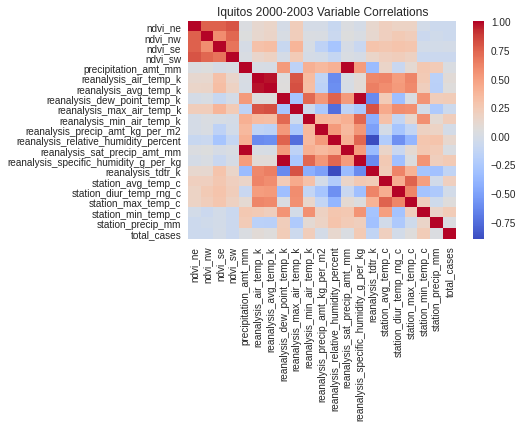

In [10]:
dataset_correlations = dataset_features.corr()
dataset_corr_heat = sns.heatmap(dataset_correlations,cmap='coolwarm',xticklabels=True, yticklabels=True)

plt.title('Iquitos 2000-2003 Variable Correlations')

With the next code, we are going to see which features have more correlation.

In [11]:
corr_matrix = dataset_features.corr()
sol = (corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
                 .stack()
                 .sort_values(ascending=False))
for index, value in sol.items():
  if value>0.80:
    print(index, value)
  

('precipitation_amt_mm', 'reanalysis_sat_precip_amt_mm') 1.0
('reanalysis_dew_point_temp_k', 'reanalysis_specific_humidity_g_per_kg') 0.9978421090828513
('reanalysis_air_temp_k', 'reanalysis_avg_temp_k') 0.9737743542998152
('reanalysis_avg_temp_k', 'reanalysis_max_air_temp_k') 0.8213536259982039
('reanalysis_max_air_temp_k', 'reanalysis_tdtr_k') 0.8088912148464726
('ndvi_ne', 'ndvi_sw') 0.8040389769615475


With this code we can see the correlation with total_cases

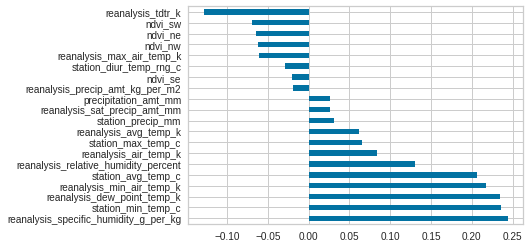

In [12]:
(dataset_correlations
     .total_cases
     .drop('total_cases')
     .sort_values(ascending=False)
     .plot
     .barh())

###Conclusions of correlation:

###Precipitation_amt_mm and reanalysis_sat_precip_amt_mm **1.0**: 

      
> This features are perfectly correlated, so one of them are redundant, no matter which one we choose. It´s not a surprise to see here these features because both represent total precipitation on the same city.

###  reanalysis_dew_point_temp_k and reanalysis_specific_humidity_g_per_kg **0.9978**:

>The dew point is the temperature at which the absolute (absolute and specific are the same but they use different measure metrics) humidity is equal to the amount of water that the air can actually hold, or the temperature at which the absolute humidity equals the relative humidity of 100%.

### reanalysis_air_temp_k and reanalysis_avg_temp_k **0.9737**:

>Average temperature and air temperature are highly correlated too.

### total_cases with  reanalysis_specific_humidity_g_perkg and reanalysis_dew_point **low correlation but noticeable**:

>This makes sense because we know mosquitos tend to live on places with high humidity

### total_cases with station_temp_c,reanalysis_min_air_temp_k and station_avg_temp_c **even lower correlation but still noticeable**:

>It also have correlation with station_temp_c,reanalysis_min_air_temp_k and station_avg_temp_c we dont have to forget that we are studying a tropic city where minimum temperatures are around 22 Cº, so maye it´s the ideal temperature for mosquitos.


**We are going to drop those that have less correlation with total_cases**

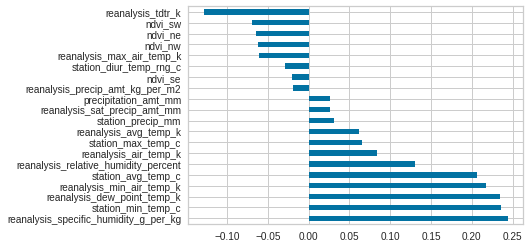

In [13]:
(dataset_correlations
     .total_cases
     .drop('total_cases')
     .sort_values(ascending=False)
     .plot
     .barh())

Those features are going to be precipitation_atm_mm, reanalysis_dew_point_temp_k and reanalysis_air_temp_k.



In [14]:
dataset_features.drop("precipitation_amt_mm", axis = 1, inplace = True)
dataset_features.drop("reanalysis_dew_point_temp_k", axis = 1, inplace = True)
dataset_features.drop("reanalysis_air_temp_k", axis = 1, inplace = True)

print(dataset_features)

                  ndvi_ne   ndvi_nw  ...  station_precip_mm  total_cases
year weekofyear                      ...                                
2000 26          0.192886  0.132257  ...                3.0            0
     27          0.216833  0.276100  ...               55.6            0
     28          0.176757  0.173129  ...               38.1            0
     29          0.227729  0.145429  ...               30.0            0
     30          0.328643  0.322129  ...                4.0            0
...                   ...       ...  ...                ...          ...
2003 48          0.274900  0.245200  ...               26.2            2
     49          0.400343  0.318057  ...              138.0            3
     50          0.358629  0.244350  ...               47.4            6
     51          0.192667  0.224400  ...               66.8            5
     52          0.285078  0.230656  ...              185.7            1

[182 rows x 18 columns]


## 2.2.2 - PCA (Principal Component Analysis)

In [15]:
pca_dataset_features = dataset_features.copy()

The Principal Component Analysis (PCA) procedure is a dimension reduction technique that projects the data on k dimensions by maximizing the variance of the data.

We are going to use MinMaxScaler by now because StandardScaler therefore cannot guarantee balanced feature scales in the presence of outliers, and we haven't detected them yet.

MinMaxScaler rescales the data set such that all feature values are in the range [0, 1] as shown in the right panel below. However, this scaling compress all inliers in the narrow range [0, 0.005] for the transformed number of households.

In [16]:
scaler = preprocessing.MinMaxScaler()
norm_data = scaler.fit_transform(pca_dataset_features)

PCA() is a powerful tool that makes all the work for us. But *a great power comes with a great responsibility* and we should know what we are doing if we want to achieve our main aim, to reduce dimensionality to reach good conclusions. For this reason, we have been studying PCA in depth, to really understands how it works and how to exploit it to our benefits. 



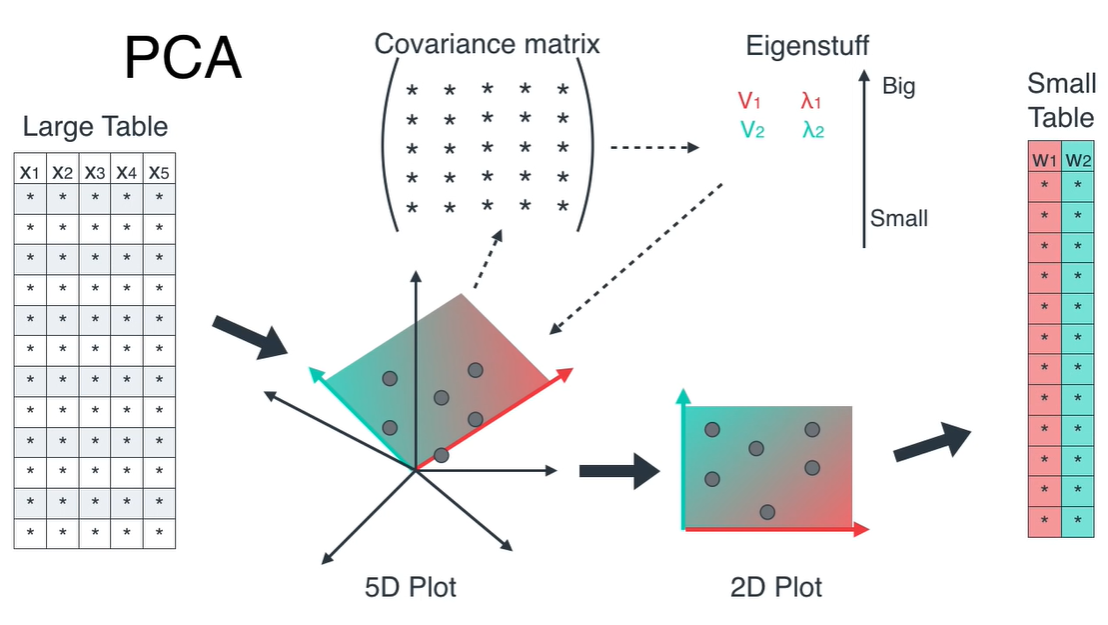

In [17]:
from sklearn.decomposition import PCA
pca = PCA ()
X_pca = pca.fit_transform(norm_data)
X_pca.shape

(182, 18)

In PCA each principal component has certain variance, that all together add up to 100% of the total variance. For each principal component, a ratio of its variance to the total variance is called the "proportion of explained variance".

In [18]:
print(pca.explained_variance_ratio_)

[0.34751853 0.21136697 0.14734099 0.06089867 0.04231122 0.03222501
 0.02872904 0.02626742 0.02148294 0.01901849 0.01738556 0.01218396
 0.00961262 0.00881213 0.00644044 0.00430628 0.00338877 0.00071093]


How are we using PCA(), we don't have to worry about calculate the eigenvalues with the covariance matrix and linear transformations.

[PCA Manual](https://www.youtube.com/watch?v=g-Hb26agBFg)

**We were interested in seeing how much variance PCA is able to explain as you increase the number of components, in order to decide how many dimensions to ultimately keep or analyze.**

**With a higher explained variance, you are able to capture more variability in your dataset, which could potentially lead to better performance when training your model.**

In [19]:
exp_var_cumul = np.cumsum(pca.explained_variance_ratio_)

px.area(
    x=range(1, exp_var_cumul.shape[0] + 1),
    y=exp_var_cumul,
    labels={"x": "# Components", "y": "Explained Variance"}
)

### **Conclusions of PCA**

Our dataset contains 18 features, but we only select the first 5 components, since they explain over 80% of the total variance.




In [20]:
n_components=5
pca = PCA(n_components=n_components)
pca_components = pca.fit_transform(norm_data)

###**PCA visualization**


We can only visualice 2 or 3 of our 5 components we have choosen.

In [21]:
fig = px.scatter(x=pca_components[:,0], y= pca_components[:,1])

for i in range(0,len(pca_components)):
     fig.add_annotation(x = pca_components[i,0], y = pca_components[i,1], text = str(pca_dataset_features.iloc[i,:].name), clicktoshow= "onout",visible = False)
fig.update_layout(
    xaxis_title="PC 1",
    yaxis_title="PC 2")
fig.show()

We can also see that the first three components in a 3D plot.

In [22]:

fig = px.scatter_3d(
    pca_components, x=0, y=1, z=2, color=pca_dataset_features['total_cases'],
    labels={'0': 'PC 1', '1': 'PC 2', '2': 'PC 3'}
)
fig.show()

Both visualization have some possible outliers that we are going to identicate in the next part.

# Outlier Identification

We are going to use density-based clustering algorithms (DBSCAN) to use distance and minimum number of points per cluster to classsify a point as an outlier.

As we can see in this [forum](https://stats.stackexchange.com/questions/361933/principal-component-analysis-and-dbscan)
, an expert recommends to don't apply density algorithms in cases where we have more than 4-5 dimensions because it can have repercussions both in the relevancy of our analysis as well as the feasibility of it.

We have 5 components in our PCA so we are fine.

In [23]:
outlier_dataset_features = dataset_features.copy()

Compute a similiarity/distance matrix

In [24]:
dist = sklearn.neighbors.DistanceMetric.get_metric('euclidean')
matsim = dist.pairwise(pca_components)
fig = px.imshow(matsim)
fig.show()

Compute the distance from each point to its neighbors. We have 182 elements, so we are going to use a number of minimum neighgors close to Napierian logarithm of 182 (ln(182)=5,204), so a number between 3 and 5 is fine.

We choose 4 because elements are usually very close together.

In [25]:
minPts = 5

A = sklearn.neighbors.kneighbors_graph(norm_data, minPts, include_self=False)
Ar = A.toarray()

seq = []
for i,s in enumerate(norm_data):
    for j in range(len(norm_data)):
        if Ar[i][j] != 0:
            seq.append(matsim[i][j])
            
seq.sort()
fig = px.line(x=np.arange(0, len(seq), 1), y=seq)
fig.show()

In [26]:
results = []
for eps in np.arange(0.1, 0.6, 0.05):
  db = DBSCAN(eps, min_samples=minPts).fit(pca_components)
  core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
  core_samples_mask[db.core_sample_indices_] = True
  labels = db.labels_
  n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
  n_outliers = list(labels).count(-1)
  #print ("%6.2f, %d, %d" % (eps, n_clusters_, n_outliers))
  results.append([eps, n_clusters_, n_outliers])

#print results
from tabulate import tabulate
print(tabulate(results, headers = ("eps", "clusters", "outliers")))

  eps    clusters    outliers
-----  ----------  ----------
 0.1            0         182
 0.15           0         182
 0.2            0         182
 0.25           7         144
 0.3            3          91
 0.35           1          46
 0.4            1          16
 0.45           1           8
 0.5            1           3
 0.55           1           2


Any distance(eps) between 0.4 and 0.5 could be perfectly correct, we are going to do a strict aproach because we have 182 elements, so we are going to work with a distance of 0.45.

In [27]:
db = DBSCAN(eps=0.45, min_samples=minPts).fit(pca_components)
labels = db.labels_
labels

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,
        0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,
       -1,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0, -1,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0])

In [28]:
fig = px.scatter_3d(x=pca_components[:,0], y= pca_components[:,1], z= pca_components[:,2], color=labels)
    

fig.show()


These are the ouliers we have detected

In [29]:
outlier_dataset_features['dbscan_group'] = labels

outlier_dataset_features[outlier_dataset_features['dbscan_group'] == -1]

ndvi_ne   ndvi_nw  ...  total_cases  dbscan_group
year weekofyear                      ...                           
2000 39          0.175686  0.099483  ...            0            -1
     46          0.099933  0.035860  ...            0            -1
2002 4           0.104129  0.148329  ...           23            -1
     27          0.101543  0.126600  ...            7            -1
     38          0.327414  0.347257  ...           22            -1
     42          0.199271  0.159243  ...           31            -1
     49          0.300800  0.252800  ...           38            -1
2003 2           0.488400  0.402443  ...            5            -1

[8 rows x 19 columns]

We drop our outliers

In [30]:
new_pca_components = pca_components.copy()
for i in range(len(outlier_dataset_features)-1,0,-1):
     if outlier_dataset_features.iloc[i][18]==-1:
       new_pca_components = np.delete(new_pca_components, i,0)


In [31]:
outlier_dataset_features = outlier_dataset_features.drop(outlier_dataset_features[outlier_dataset_features.dbscan_group == -1].index)


In [32]:
print(len(new_pca_components))
print(len(outlier_dataset_features))

174
174


We visualice again without them

In [33]:
fig = px.scatter_3d(x=new_pca_components[:,0], y= new_pca_components[:,1], z= new_pca_components[:,2])
    
fig.show()

# 3 - Clustering

## 3.1 Buscar el valor de k
Vamos a realizar el clustering con el algoritmo K-Means ya que es rápido, robusto, además de tener buena escalabilidad de datos y proporcionar resultados confiables si los datos son distintos o están separados entre sí de forma lineal.


Como se puede apreciar en el gráfico del PCA, tenemos los datos bastante dispersos, por lo que ahora debemos especificar el número de **clústeres** en los que vamos a dividir nuestro conjunto de datos, ya que una gran k disminuye el error, pero aumenta el riesgo de sobreajuste.

Por ello, vamos a probar con dos **algoritmos para decidir la k** óptima para nuestro problema: Elbow y Silhouette, cada uno con unas características de las que hablaremos más adelante.

In [34]:
distortions = []
score = []

K = range(2,18)
for k in K:
    kmeanModel = KMeans(n_clusters=k, random_state=42).fit(new_pca_components)
    kmeanModel.fit(new_pca_components)
    distortions.append(sum(np.min(cdist(new_pca_components, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / new_pca_components.shape[0])
    score.append(silhouette_score(new_pca_components, kmeanModel.labels_, metric='euclidean'))

### 3.1.1. Elbow method

Este método **Elbow** es usado cuando no se dispone de información adicional en la que basarse para realizar el k-means. 

Este algoritmo se basa en reducir la suma total de varianza *intra-cluster*. Cuando la diferencia de ese valor deja de ser sustancial, se identifica como el número k óptimo.

Mientras que el método **Silhouette** se decine como al diferencia entre la distancia media a los elementos del clúster más cercano  y a distancia *intra-cluster* media de los elementos de un clúster dividido por el máximo de los dos, maximizando su valor cuando se alcanza el número de clústeres óptimos para el conjunto de datos.

Text(0.5, 1.0, 'The Silhouette Method showing the optimal k')

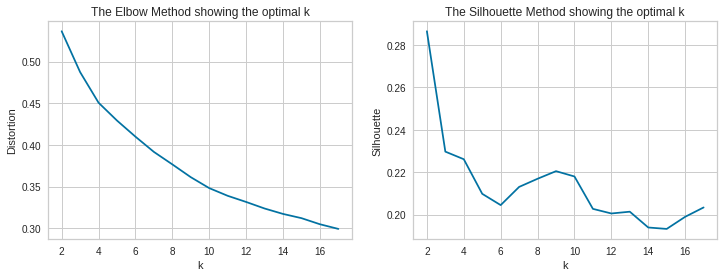

In [35]:
fig, axes = plt.subplots(1,2, figsize=(12,4))

axes[0].plot(K, distortions, 'bx-')
axes[0].set_xlabel('k')
axes[0].set_ylabel('Distortion')
axes[0].set_title('The Elbow Method showing the optimal k')

axes[1].plot(K, score, 'bx-')
axes[1].set_xlabel('k')
axes[1].set_ylabel('Silhouette')
axes[1].set_title('The Silhouette Method showing the optimal k')


### 3.1.3 Conclusion

Para elegir la k óptima para nuestro dataset, tenemos que comparar ambos métodos y buscar un punto en medio, intentando minimizar la k. 
Analizando los datos de ambos métodos, la k=5 nos encontramos un valor intermedio.


In [36]:
##@title Number of clusters {run: "auto"}
k = 5 #@param { type: "slider", min: 2, max: 11, step: 1}

## 3.2 K-means random

Al comprobar las dos inicializaciones del k-means, nos quedamos con la inicialización 'random', ya que no encontramos diferencias muy sustanciales, pero la complejidad es mucho menor.

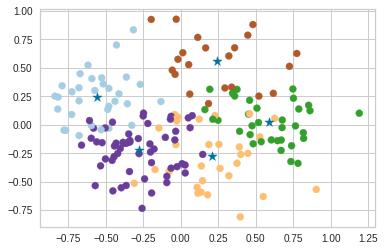

In [37]:
kmeansRandom = KMeans(n_clusters=k, init='random', max_iter=300, n_init=100, random_state=0)
pred_y = kmeansRandom.fit_predict(new_pca_components)
plt.scatter(new_pca_components[:,0], new_pca_components[:,1], c = kmeansRandom.labels_, cmap=plt.cm.Paired)
plt.scatter(kmeansRandom.cluster_centers_[:, 0], kmeansRandom.cluster_centers_[:, 1], marker='*', s=100)
plt.show()

## 3.3 K-means++

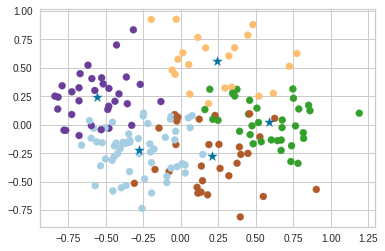

In [38]:
kmeanspp = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=100, random_state=0)
pred_y = kmeanspp.fit_predict(new_pca_components)
plt.scatter(new_pca_components[:,0], new_pca_components[:,1], c = kmeanspp.labels_, cmap=plt.cm.Paired)
plt.scatter(kmeanspp.cluster_centers_[:, 0], kmeanspp.cluster_centers_[:, 1], marker='*', s=100)
plt.show()

## 3.4 Interpretation

A continuación vamos a interpretar los datos y ver las estadisticas con referencia a la agrupación de los datos.

In [39]:
print ("Number of clusters", k)
y_kmeansRandom = kmeansRandom.fit_predict(new_pca_components)

from sklearn import metrics
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(new_pca_components, y_kmeansRandom))
      
print('Distortion: %.2f' % kmeansRandom.inertia_)

Number of clusters 5
Silhouette Coefficient: 0.217
Distortion: 35.01


In [42]:
outlier_dataset_features['kmeans_group'] = kmeansRandom.labels_

In [46]:
fig = px.scatter(x=new_pca_components[:,0], y= new_pca_components[:,1], color = kmeansRandom.labels_)
for i in range(0,len(pca_components)):
     fig.add_annotation(x = pca_components[i,0], y = pca_components[i,1], text = str(pca_dataset_features.iloc[i,:].name), clicktoshow= "onout",visible = False)
fig.show()

Me quedo con los valores que varían un poco más entre ellas

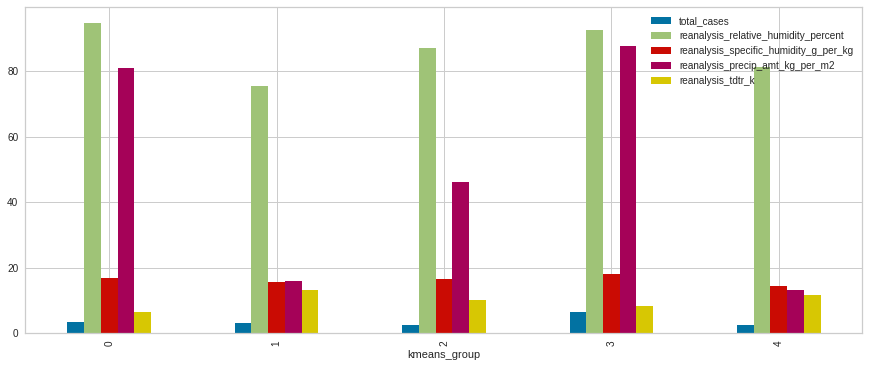

In [44]:
res = outlier_dataset_features[['total_cases',
                                'reanalysis_relative_humidity_percent',
                                'reanalysis_specific_humidity_g_per_kg',
                                'reanalysis_precip_amt_kg_per_m2',
                                'reanalysis_tdtr_k',
                                'kmeans_group']].groupby(('kmeans_group')).mean()
res.plot(kind='bar', figsize=(15,6))


In [45]:
res

,total_cases,reanalysis_relative_humidity_percent,reanalysis_specific_humidity_g_per_kg,reanalysis_precip_amt_kg_per_m2,reanalysis_tdtr_k
kmeans_group,,,,,
0,3.468750,94.805312,16.959018,80.927812,6.488393
1,3.029412,75.354034,15.489622,15.897941,13.116387
2,2.645161,86.988111,16.551152,46.116774,10.076037
3,6.464286,92.409056,17.957628,87.658750,8.275255
4,2.476190,81.366259,14.401565,13.133333,11.534694


Lo primero que podemos observar es que la humedad específica es bastante similar en todos los grupos, esto se puede deber a que los datos son sobre la ciudad de Iquitos, con un clima ecuatorial.

Algo a destacar sería que el grupo 3 es el que más casos tiene, por lo que se habría que estudiar las condiciones que lo provocan, como puede ser las altas precipitaciones unido a una humedad elevada y una variación de las temperaturas diurnas pequeña, por lo que el mosquito puede ser sensible a los cambios bruscos de temperatura con altas precipitaciones.

